# Escalamiento de la incertidumbre en el movimiento browniano
Pablo josué Panécatl García

In [15]:
import numpy as np
import matplotlib.pyplot as plt

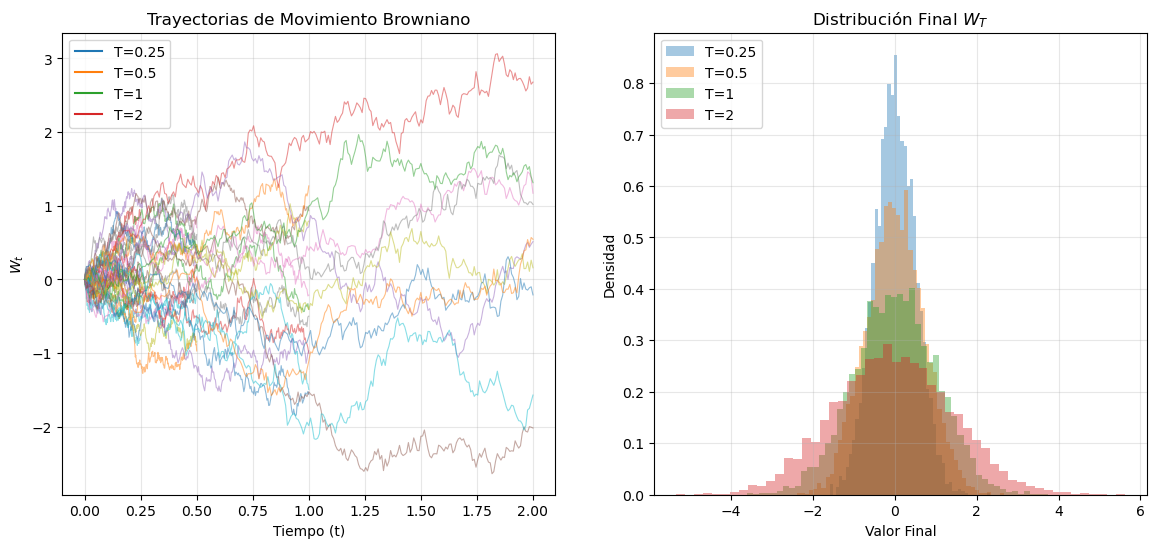

In [16]:
n_simulaciones = 5000
pasos = 252
horizontes_T = [0.25, 0.5, 1, 2]

resultados_finales = {}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for i, T in enumerate(horizontes_T):
    dt = T / pasos
    incrementos = np.random.normal(loc=0.0, 
                                   scale=np.sqrt(dt), 
                                   size=(n_simulaciones, pasos))
    
    trayectorias = np.cumsum(incrementos, axis=1)
    W = np.hstack([np.zeros((n_simulaciones, 1)), trayectorias])
    
    valores_final_T = W[:, -1]
    resultados_finales[T] = valores_final_T
    
    eje_tiempo = np.linspace(0, T, pasos + 1)
    for j in range(10): 
        ax1.plot(eje_tiempo, W[j, :], alpha=0.5, linewidth=0.8)
    ax1.plot([], [], label=f'T={T}')

    ax2.hist(valores_final_T, bins=50, density=True, alpha=0.4, 
             label=f'T={T}')

ax1.set_title("Trayectorias de Movimiento Browniano")
ax1.set_xlabel("Tiempo (t)")
ax1.set_ylabel(r"$W_t$")
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

ax2.set_title(r"Distribución Final $W_T$")
ax2.set_xlabel("Valor Final")
ax2.set_ylabel("Densidad")
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.show()

In [18]:
print("\n" + "="*70)
print(f"{'Horizonte (T)':^15} | {'Media Empírica':^15} | {'Varianza Emp.':^15} | {'Desv. Est. Emp.':^15}")
print("="*70)

for T in horizontes_T:
    datos = resultados_finales[T]

    media = np.mean(datos)
    varianza = np.var(datos)
    desv_std = np.std(datos)
    
    print(f"{T:^15.2f} | {media:^15.4f} | {varianza:^15.4f} | {desv_std:^15.4f}")

print("="*70)


 Horizonte (T)  | Media Empírica  |  Varianza Emp.  | Desv. Est. Emp.
     0.25       |     0.0074      |     0.2535      |     0.5035     
     0.50       |     0.0091      |     0.5010      |     0.7078     
     1.00       |     0.0168      |     1.0041      |     1.0020     
     2.00       |     -0.0360     |     2.0675      |     1.4379     


## Preguntas

1. **¿Cómo cambia la dispersión de la distribución al aumentar el horizonte temporal?**
   La dispersión aumenta conforme crece el horizonte temporal. Gráficamente, esto se observa en los histogramas, que se vuelven más anchos y aplanados a medida que pasa de 0.25 a 2.

2. **¿La media del proceso depende del tiempo?**
   No. La media teórica de un movimiento browniano estándar es siempre 0, independientemente del horizonte temporal. 

3. **¿Qué relación observas entre la varianza y el tiempo?**
   Existe una relación lineal directa. En el movimiento browniano estándar, la varianza teórica es igual al tiempo. 

4. **Si el horizonte temporal se cuadruplica, ¿qué ocurre aproximadamente con la desviación estándar?**
   La desviación estándar se duplica. Esto se debe a la "regla de la raíz cuadrada del tiempo": la volatilidad escala con $\sqrt{T}$. Si $T$ aumenta por un factor de 4, la desviación estándar aumenta por $\sqrt{4} = 2$.

5. **¿Qué implicaciones tiene este comportamiento para el riesgo financiero a distintos horizontes?**
   Implica que la incertidumbre (riesgo) de un activo aumenta con el tiempo, pero no de manera lineal. El riesgo acumulado a largo plazo es mayor que a corto plazo, pero crece a una tasa decreciente (es decir, el riesgo a 10 años no es 10 veces el riesgo de 1 año, sino $\sqrt{10} \approx 3.16$ veces).